In [2]:
%load_ext autoreload
import glob
import nibabel
import pandas as pd
import numpy as np

from collections import defaultdict, Counter
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook, tqdm
from joblib import Parallel, delayed

from IPython.core.debugger import set_trace

import os
import shutil
import argparse
import time
import json
import pickle

import torch
from torch import nn
from torch import autograd
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from models.v2v import V2VModel

import yaml
from easydict import EasyDict as edict

from utils import show_slices, check_patch, pad_arrays, create_dicts, normalized, load

from multiprocessing import cpu_count
N_CPU = cpu_count()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

import cc3d

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important}</style>"))

from celluloid import Camera

SEED = 42
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
root = '../MICCAI_BraTS2020_TrainingData'

In [5]:
for name in os.listdir(root):
    break

In [26]:
os.listdir(os.path.join(root, name))

['BraTS20_Training_333_t1ce.nii.gz',
 'BraTS20_Training_333_t1.nii.gz',
 'BraTS20_Training_333_seg.nii.gz',
 'BraTS20_Training_333_flair.nii.gz',
 'BraTS20_Training_333_t2.nii.gz']

['BraTS20_Training_333_t1ce.nii.gz',- better quality but still sucks  
 'BraTS20_Training_333_t1.nii.gz', - bad quality  
 'BraTS20_Training_333_seg.nii.gz',- labels  
 'BraTS20_Training_333_flair.nii.gz', - bad quality  
 'BraTS20_Training_333_t2.nii.gz']  

In [39]:
brain = nibabel.load(os.path.join(root, name, name + '_t2.nii.gz')).get_fdata()
# brain = normalized(brain)

In [40]:
brain.min(), brain.max()

(0.0, 5935.0)

In [41]:
brain.shape

(240, 240, 155)

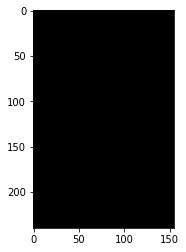

In [42]:
plt.ioff()

fig, ax = plt.subplots()
X_max, Y_max, Z_max = brain.shape
camera = Camera(fig)
n_slides = 100
for i in range(n_slides):

    y_slice_pos = (Y_max//(n_slides+2))*(i+1)

    brain_tensor_slice = brain[y_slice_pos,:,:]
    ax.imshow(brain_tensor_slice, 'gray')

#     if mask_tensor is not None:
#         mask_tensor_slice = mask_tensor[:,y_slice_pos,:]
#         ax.imshow(mask_tensor_slice, 'jet', interpolation='none', alpha=0.7)

    camera.snap()

animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation